## Q Learning
어떤 상황 s에서 어떤 행동 a의 가치를 Q(s, a)라 하자. 그렇다면 가장 좋은 행동은 Q(s, a)가 가장 큰 a이다. 그렇다면 Q 값은 어떻게 구할까? 보상(reward)를 바탕으로 Q 값을 갱신하면 된다.

다음의 수식에 따라 Q값을 갱신하는 것을 Q-Learning이라 한다.

$$Q(s,a) ←Q(s,a) + \alpha \left [ r + \gamma max_{a'} Q(s', a') - Q(s,a)\right]$$

### e-greedy
강화학습에선 탐험하는 것이 중요하다. 이번 시간엔 epsilon greedy 알고리즘을 이용해 에이전트가 탐험하도록 할 것이다.

e-greedy 알고리즘의 작동 방식은 다음과 같다.
- 일정한 확률로 임의의 행동을 선택한다.
- 그 외에는 가장 좋은 행동을 선택한다.

In [0]:
import random
import numpy as np
from collections import defaultdict

# Q-Learning를 이용한 에이전트를 만들자.
class Agent:
  def __init__(self, actions):
    # 할 수 있는 행동의 집합
    self.actions = actions

    # 학습률로, 한 번에 얼마나 학습할지 결정한다.
    self.learning_rate = 0.85

    # 감가율
    self.discount_factor = 0.9

    # 무작위로 행동을 선택할 비율이다.
    # 강화학습에선 탐험이 중요하기 때문에 무작위 선택도 넣는다.
    self.epsilon = 0.9

    # Q(s, a)를 담아둔 테이블이다
    self.q_table = defaultdict(lambda: [0. for _ in range(actions.n)])

  # state를 받아 할 행동을 구하는 메소드
  def get_action(self, state):
    if random.random() < self.epsilon:
      # 일정한 확률로 임의의 행동을 한다.
      return self.actions.sample()
    else:
      q_values = self.q_table[state]
      return np.argmax(q_values)

  # 보상을 바탕으로 Q table을 업데이트 하는 메소드
  def train(self, state, action, reward, next_state):
    q1 = self.q_table[state][action]
    q2 = reward + self.discount_factor * max(self.q_table[next_state])

    self.q_table[state][action] += self.learning_rate * (q2 - q1)

In [0]:
import gym

# 위에서 만든 에이전트를 바탕으로 학습을 시켜보자.
# 다만, 문제를 조금 쉽게 하기 위해 미끄럼 방지를 켜둔다.
env = gym.make('FrozenLake-v0', is_slippery=False)
agent = Agent(env.action_space)

# 시간에 따른 보상의 변화를 보기 위해 받은 보상을 저장해두자.
rewards = []

# 1000 에피소드를 수행한다.
for episode in range(1, 3000 + 1):
  state = env.reset()

  episode_rewards = []
  while True:
    action = agent.get_action(state)
    next_state, reward, done, _ = env.step(action)

    if done:
      # 만약 죽었다면 음의 보상을 준다.
      if reward == 0:
        reward = -1

      agent.train(state, action, reward, next_state)
      episode_rewards.append(reward)
      break
    else:
      agent.train(state, action, reward, next_state)
      episode_rewards.append(reward)

    state = next_state

  rewards.append(sum(episode_rewards) / len(episode_rewards))

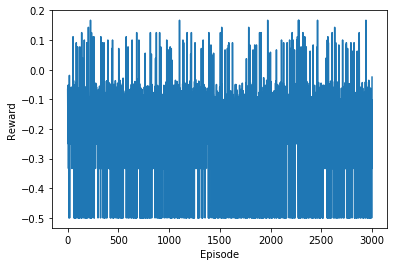

In [3]:
# 이제 그래프를 그려보자
import matplotlib.pyplot as plt
%matplotlib inline

X = [i for i in range(1, 3000 + 1)]

plt.plot(X, rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')

plt.show()

In [4]:
# 에이전트가 정상적으로 학습이 됐는지 확인하기 위해 epsilon을 0으로 하고 에피소드를 수행해보자.
state = env.reset()
agent.epsilon = 0

while True:
  env.render()

  print(agent.q_table[state])

  action = agent.get_action(state)
  next_state, reward, done, _ = env.step(action)

  state = next_state

  if done:
    if reward > 0:
      print('Solved!')
    else:
      print('Failed')

    env.render()
    break


SFFF
FHFH
FFFH
HFFG
[0.5314410000000002, 0.5904900000000002, 0.5904900000000002, 0.5314410000000002]
  (Down)
SFFF
FHFH
FFFH
HFFG
[0.5904900000000002, 0.6561000000000001, -1.0, 0.5314410000000002]
  (Down)
SFFF
FHFH
FFFH
HFFG
[0.6561000000000001, -1.0, 0.7290000000000001, 0.5904900000000002]
  (Right)
SFFF
FHFH
FFFH
HFFG
[0.6561000000000001, 0.81, 0.81, -1.0]
  (Down)
SFFF
FHFH
FFFH
HFFG
[-1.0, 0.81, 0.9, 0.7290000000000001]
  (Right)
SFFF
FHFH
FFFH
HFFG
[0.81, 0.9, 1.0, 0.81]
Solved!
  (Right)
SFFF
FHFH
FFFH
HFFG
